Libraries imported successfully.
Project configuration set.

--- 3. Data Loading ---
Successfully loaded data from 'heart_disease_dataset.csv'.
Dataset shape: (400, 14)

--- 4. Exploratory Data Analysis (EDA) ---
First 5 rows of the dataset:
   age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   58    1                1                     134          246   
1   52    0                2                     112          245   
2   59    0                2                     126          196   
3   67    1                1                     165          201   
4   51    1                0                     146          174   

   fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_induced_angina  \
0                    0            0             155                        0   
1                    0            0             143                        1   
2                    0            0             162                        1   
3                    0 

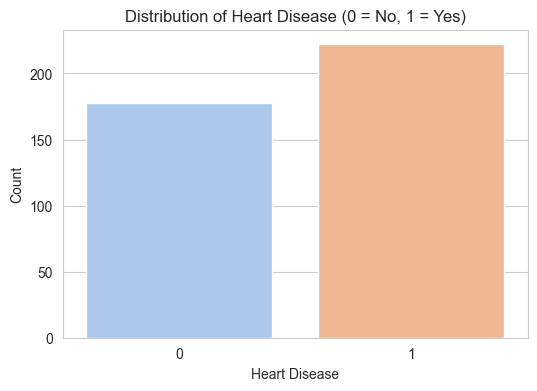

Saved eda_target_distribution.png


<Figure size 640x480 with 0 Axes>

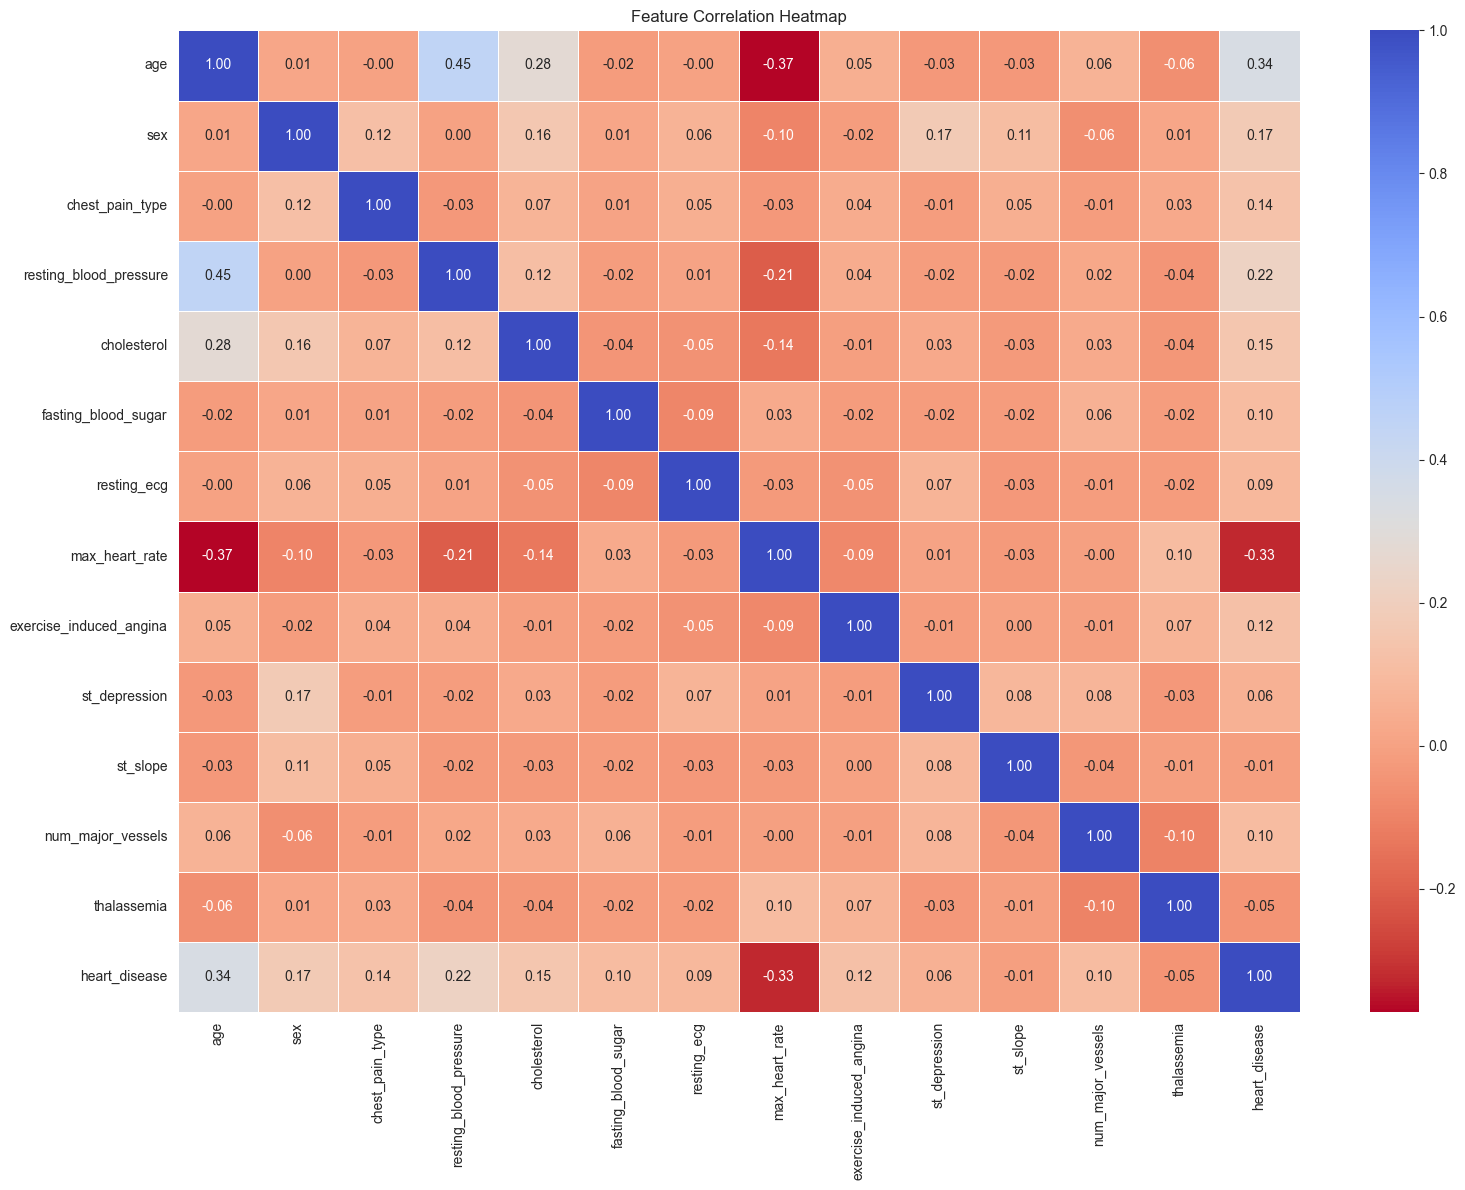

Saved eda_correlation_heatmap.png


<Figure size 640x480 with 0 Axes>

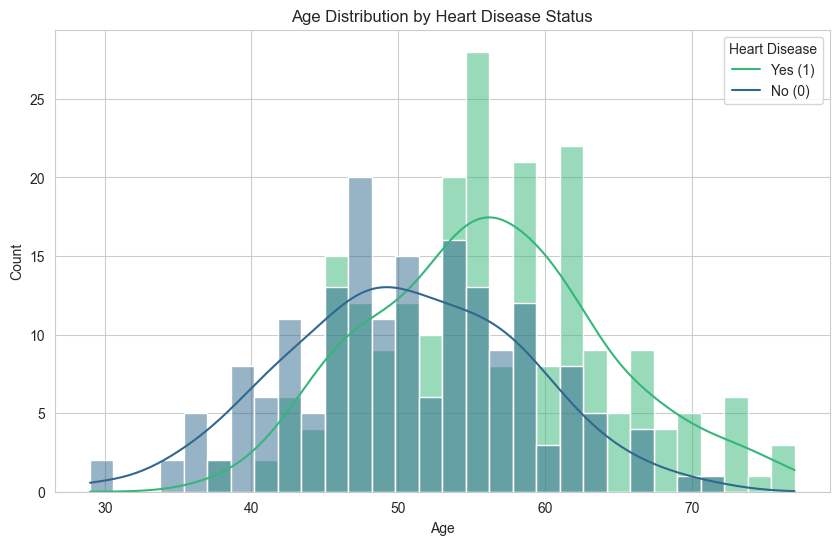

Saved eda_age_distribution.png
EDA complete. Plots saved to disk.

--- 5. Preprocessing & Data Splitting ---
Training set: 320 samples (80.0%)
Testing set: 80 samples (20.0%)
Data successfully split. Scaling will be part of the model pipeline.

--- 6. Hyperparameter Tuning ---
Searching for best parameters using 5-fold Cross-Validation...

Tuning Logistic Regression...
Best ROC-AUC (CV) score: 0.7542
Best parameters found: {'classifier__C': 0.1, 'classifier__solver': 'liblinear'}

Tuning Decision Tree...
Best ROC-AUC (CV) score: 0.6477
Best parameters found: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 5}

Tuning Random Forest...
Best ROC-AUC (CV) score: 0.7160
Best parameters found: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 5, 'classifier__n_estimators': 100}

Tuning SVM...
Best ROC-AUC (CV) score: 0.7647
Best parameters found: {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}

Hype

<Figure size 640x480 with 0 Axes>

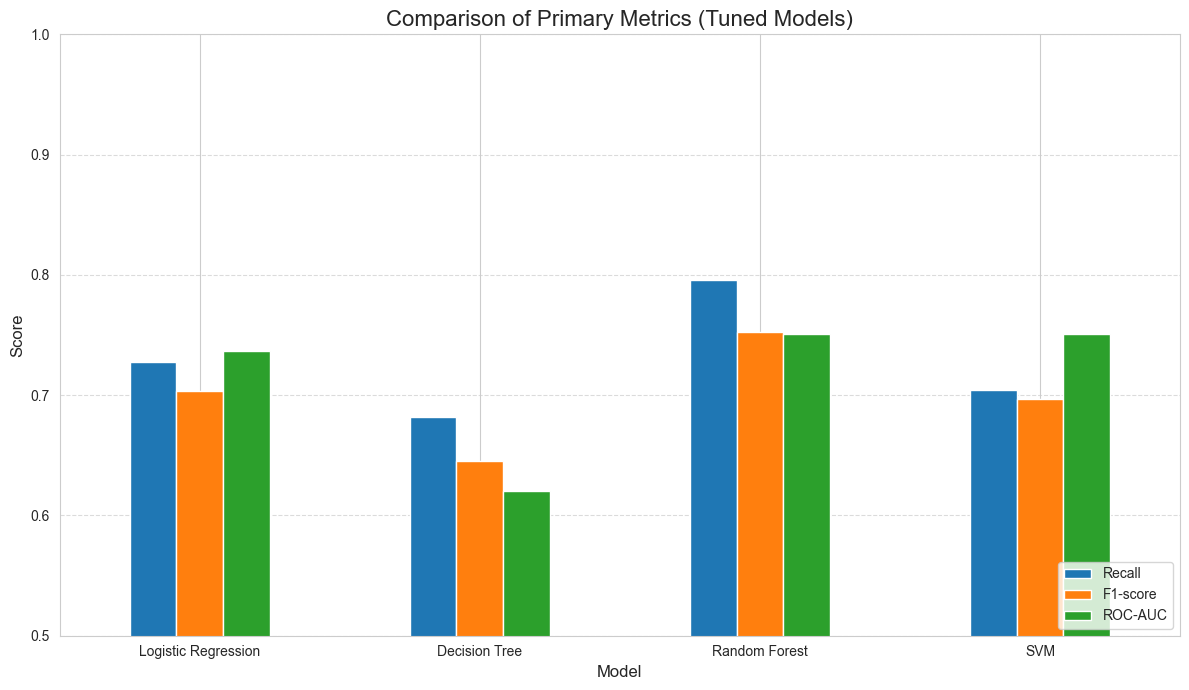

Saved comparison_primary_metrics.png


<Figure size 640x480 with 0 Axes>

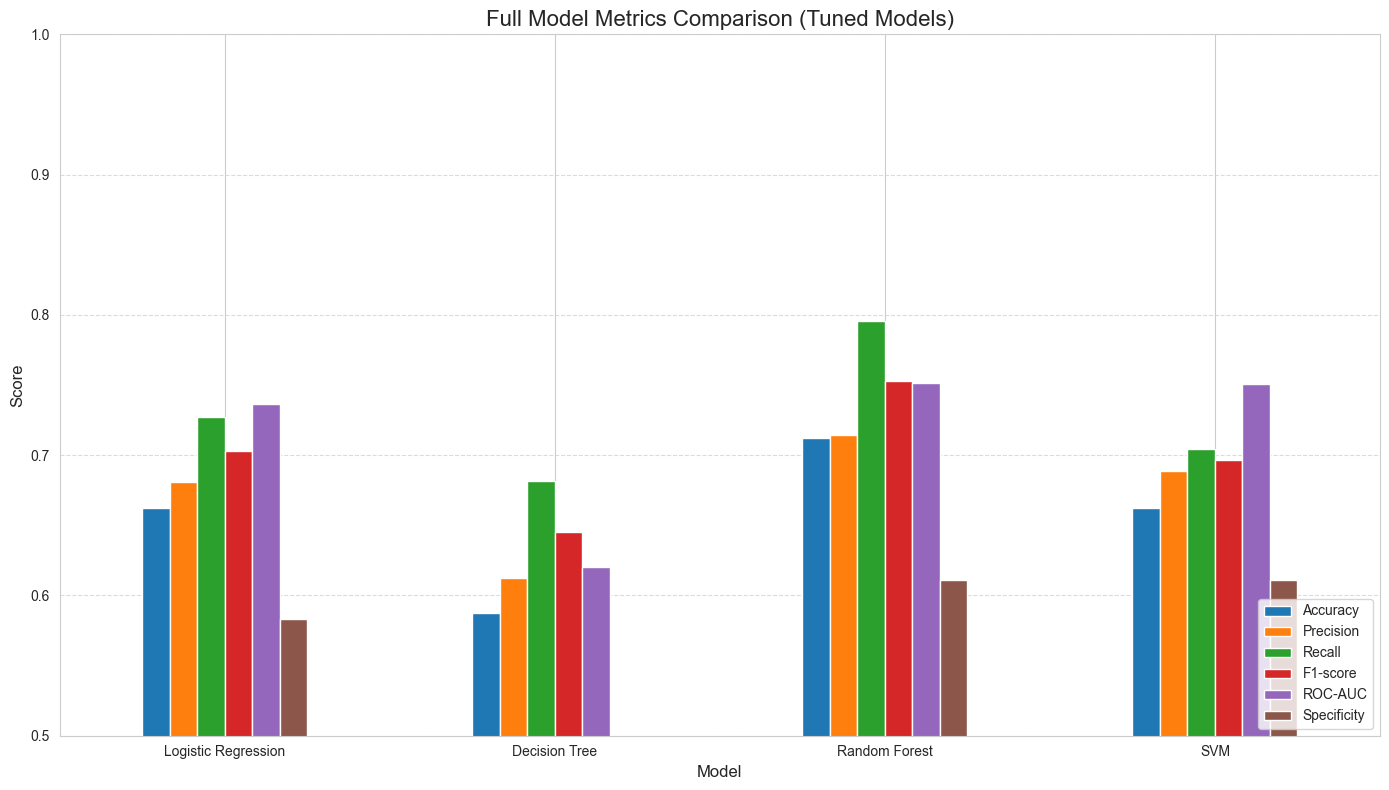

Saved comparison_all_metrics.png

--- 9. ROC Curve Visualization ---
Generating comparative ROC Curve plot...


<Figure size 640x480 with 0 Axes>

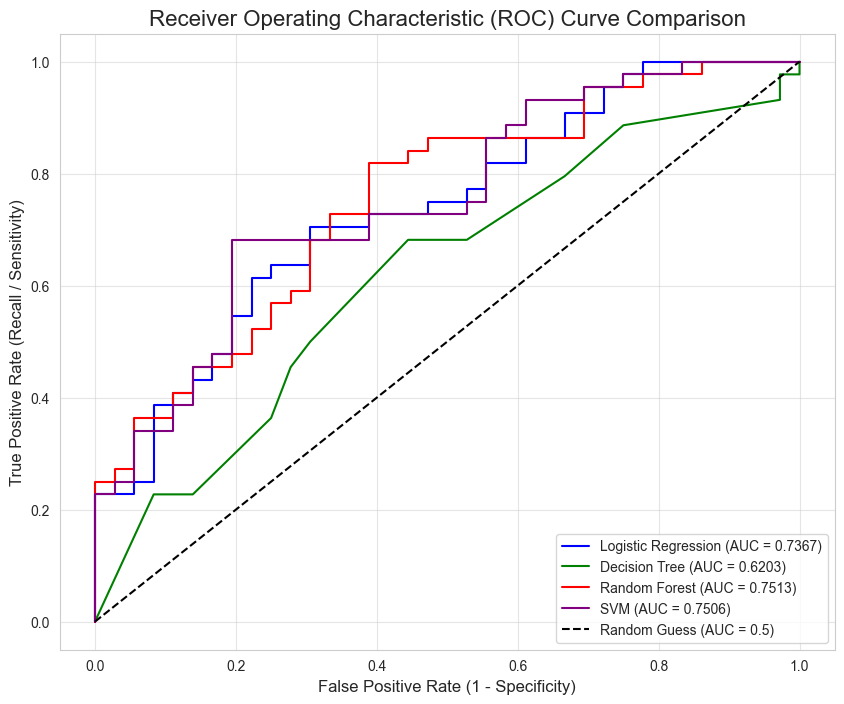

Saved comparison_roc_curve.png

--- 9.5. Feature Importance & Explainability ---
Analyzing feature importances for top models...


<Figure size 640x480 with 0 Axes>

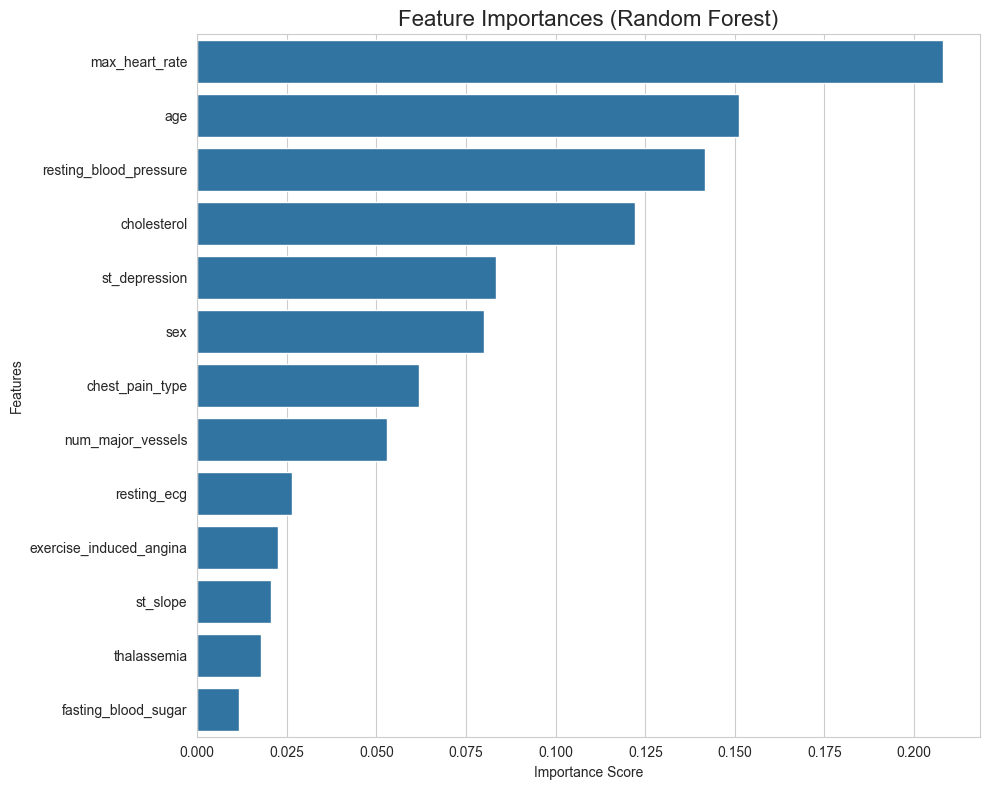

Saved feature_importance_rf.png


<Figure size 640x480 with 0 Axes>

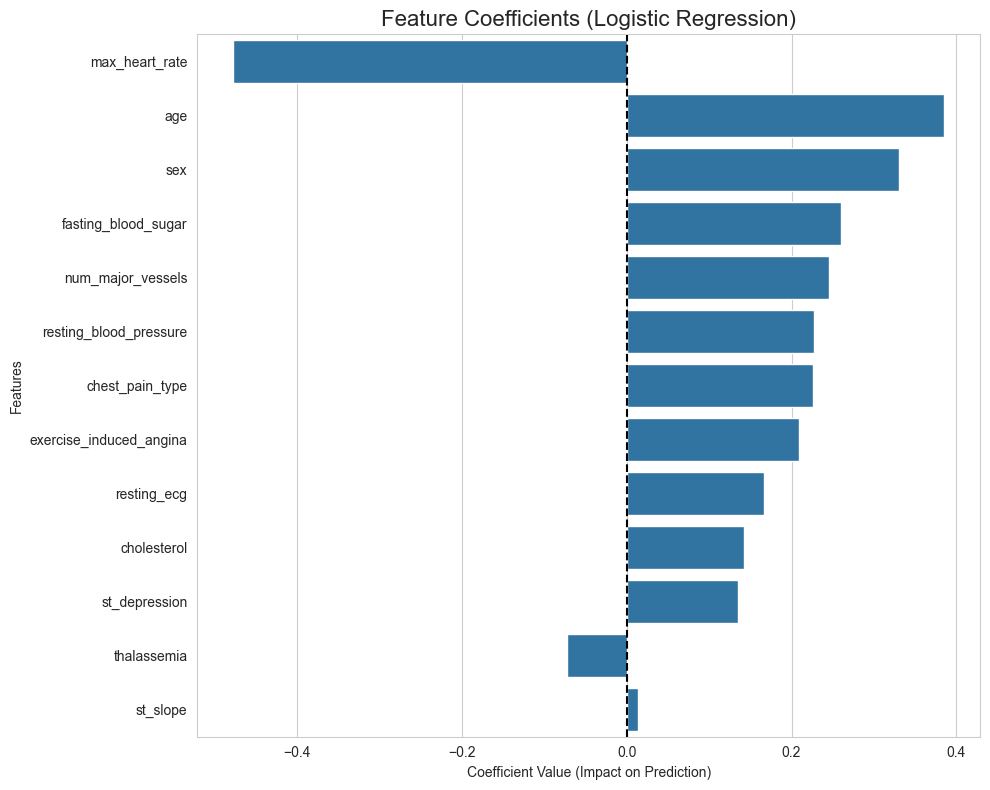

Saved feature_coefficients_lr.png

Logistic Regression Coefficient Interpretation:
 - Positive values increase the likelihood of heart disease.
 - Negative values decrease the likelihood of heart disease.

--- 9.C. Saving Final Tuned Models ---
Successfully saved 'Logistic Regression' model to 'logistic_regression_model.joblib'
Successfully saved 'Decision Tree' model to 'decision_tree_model.joblib'
Successfully saved 'Random Forest' model to 'random_forest_model.joblib'
Successfully saved 'SVM' model to 'svm_model.joblib'
All tuned models have been saved to disk.

--- 10. Conclusion ---
Optimized machine learning pipeline complete.

Best model based on ROC-AUC: Random Forest (Score: 0.7513)
Best model based on Recall (Sensitivity): Random Forest (Score: 0.7955)

--- Project End ---


<Figure size 640x480 with 0 Axes>

In [5]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""
Capstone Project 2: Heart Disease Detection (Optimized)

Description: This script implements an optimized machine learning pipeline for heart 
             disease classification. It includes:
             1. Data Loading
             2. Exploratory Data Analysis (EDA)
             3. Preprocessing (Scaling)
             4. Hyperparameter Tuning (GridSearchCV) for 4 models
             5. Comparative evaluation with all required metrics
             6. ROC Curve visualization for all models

Project Details:
- Title: Heart Disease Detection using Classification Algorithms
- Objective: Compare tuned Decision Tree, Random Forest, Logistic Regression, SVM
- Dataset: heart_disease_dataset.csv
- Target: 'heart_disease' (0=No, 1=Yes)
"""

# =============================================================================
# 1. IMPORT LIBRARIES
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline 
import joblib
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score,
    confusion_matrix, 
    classification_report,
    roc_curve,  # Added for ROC visualization
    auc         # Added for ROC visualization
)
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

print("Libraries imported successfully.")

# =============================================================================
# 2. PROJECT CONFIGURATION
# =============================================================================
FILE_PATH = 'heart_disease_dataset.csv'
TARGET_COLUMN = 'heart_disease'
# Split data 80% training / 20% testing
TEST_SPLIT_SIZE = 0.2
# Use a random state for reproducibility
RANDOM_SEED = 42
# Folds for cross-validation during tuning
CV_FOLDS = 5 

print("Project configuration set.")

# =============================================================================
# 3. LOAD DATA
# =============================================================================
try:
    df = pd.read_csv(FILE_PATH)
    print(f"\n--- 3. Data Loading ---")
    print(f"Successfully loaded data from '{FILE_PATH}'.")
    print(f"Dataset shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: The file '{FILE_PATH}' was not found.")
    print("Please make sure the dataset is in the same directory as the script.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    exit()

# =============================================================================
# 4. EXPLORATORY DATA ANALYSIS (EDA)
# =============================================================================
print("\n--- 4. Exploratory Data Analysis (EDA) ---")
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Information (Data Types and Non-null Counts):")
# Confirms no missing values and all numerical format
df.info()

print("\nStatistical Summary of Numerical Features:")
print(df.describe())

print(f"\nTarget Variable '{TARGET_COLUMN}' Distribution:")
print(df[TARGET_COLUMN].value_counts(normalize=True))

# --- EDA Visualizations ---
print("\nGenerating EDA plots...")
sns.set_style("whitegrid")

# 1. Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=TARGET_COLUMN, data=df, palette='pastel')
plt.title('Distribution of Heart Disease (0 = No, 1 = Yes)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()
plt.savefig('eda_target_distribution.png')
print("Saved eda_target_distribution.png")

# 2. Correlation Heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm_r', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()
plt.savefig('eda_correlation_heatmap.png')
print("Saved eda_correlation_heatmap.png")

# 3. Age Distribution by Heart Disease
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue=TARGET_COLUMN, kde=True, bins=30, palette='viridis')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Yes (1)', 'No (0)'])
plt.show()
plt.savefig('eda_age_distribution.png')
print("Saved eda_age_distribution.png")

print("EDA complete. Plots saved to disk.")

# =============================================================================
# 5. PREPROCESSING & DATA SPLITTING
# =============================================================================
print("\n--- 5. Preprocessing & Data Splitting ---")

# Define features (X) and target (y)
X = df.drop(TARGET_COLUMN, axis=1)
y = df[TARGET_COLUMN]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=TEST_SPLIT_SIZE, 
    random_state=RANDOM_SEED,
    stratify=y  # Ensure target distribution is similar in train/test splits
)

print(f"Training set: {X_train.shape[0]} samples (80.0%)")
print(f"Testing set: {X_test.shape[0]} samples (20.0%)")

# Feature Scaling will be handled *inside* the pipeline to prevent data leakage.
print("Data successfully split. Scaling will be part of the model pipeline.")

# =============================================================================
# 6. HYPERPARAMETER TUNING (GRIDSEARCHCV)
# =============================================================================
print("\n--- 6. Hyperparameter Tuning ---")
print(f"Searching for best parameters using {CV_FOLDS}-fold Cross-Validation...")

# Define parameter grids for each model
# These grids are intentionally kept small to run reasonably fast
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__solver': ['liblinear', 'lbfgs']
    },
    'Decision Tree': {
        'classifier__max_depth': [None, 5, 10, 15],
        'classifier__min_samples_leaf': [1, 5, 10],
        'classifier__criterion': ['gini', 'entropy']
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_leaf': [1, 2, 5]
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__gamma': ['scale', 'auto']
    }
}

# Define models
base_models = {
    'Logistic Regression': LogisticRegression(random_state=RANDOM_SEED),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_SEED),
    'Random Forest': RandomForestClassifier(random_state=RANDOM_SEED),
    'SVM': SVC(probability=True, random_state=RANDOM_SEED) 
}

# Store best models and tuning results
best_tuned_models = {}

for name, model in base_models.items():
    print(f"\nTuning {name}...")
    
    # Create a pipeline to scale data *before* feeding to classifier
    # This prevents data leakage during cross-validation
    pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                               ('classifier', model)])
    
    # Get the parameter grid for this model
    grid = param_grids[name]
    
    # Setup GridSearchCV
    # We tune based on ROC-AUC, a robust primary metric
    grid_search = GridSearchCV(
        estimator=pipeline, 
        param_grid=grid, 
        cv=CV_FOLDS, 
        scoring='roc_auc', 
        n_jobs=-1, # Use all available CPU cores
        verbose=0  # Set to 1 or 2 for more detailed logs
    )
    
    # Fit on the *entire* training set (GridSearchCV handles the CV splitting)
    # We use the unscaled X_train here, as scaling is now *part* of the pipeline
    grid_search.fit(X_train, y_train)
    
    # Save the best model found
    best_tuned_models[name] = grid_search.best_estimator_
    
    print(f"Best ROC-AUC (CV) score: {grid_search.best_score_:.4f}")
    print(f"Best parameters found: {grid_search.best_params_}")

print("\nHyperparameter tuning complete.")

# =============================================================================
# 7. MODEL EVALUATION (ON TEST SET)
# =============================================================================
print("\n--- 7. Final Model Evaluation on Test Set ---")

# Store results for final comparison
results_list = []
# Store data for ROC curve plot
roc_plot_data = {}

# Loop through each *tuned* model to evaluate
for name, model in best_tuned_models.items():
    
    # Make predictions on the *unseen* test set
    # Note: We use X_test (unscaled) because the 'model' is now a
    # pipeline that includes its own scaling step.
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] 
    
    print(f"\n--- Evaluating {name} ---")
    
    # --- Calculate Evaluation Metrics ---
    # Primary Metrics
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Secondary Metrics
    accuracy = accuracy_score(y_test, y_pred)
    
    # Specificity (from confusion matrix)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    # Print Classification Report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred, target_names=['No Disease (0)', 'Has Disease (1)']))
    
    print(f"Confusion Matrix for {name}:")
    print(cm)
    
    # Store results for table
    results_list.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC-AUC': roc_auc,
        'Specificity': specificity
    })
    
    # Store data for ROC plot
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_plot_data[name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

# =============================================================================
# 8. MODEL COMPARISON & RESULTS
# =============================================================================
print("\n--- 8. Model Comparison & Results ---")

# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list).set_index('Model')

print("Final Tuned Model Performance Comparison Report:")
print(results_df.round(4))

# --- Results Visualizations ---
print("\nGenerating model comparison plots...")

# 1. Plot Primary Metrics: Recall, F1-score, ROC-AUC
primary_metrics = ['Recall', 'F1-score', 'ROC-AUC']
results_df[primary_metrics].plot(kind='bar', figsize=(12, 7), rot=0)
plt.title('Comparison of Primary Metrics (Tuned Models)', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0.5, 1.0) # Adjust y-axis to better see differences
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.savefig('comparison_primary_metrics.png')
print("Saved comparison_primary_metrics.png")

# 2. Plot All Metrics
results_df.plot(kind='bar', figsize=(14, 8), rot=0)
plt.title('Full Model Metrics Comparison (Tuned Models)', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0.5, 1.0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.savefig('comparison_all_metrics.png')
print("Saved comparison_all_metrics.png")

# =============================================================================
# 9. ROC CURVE VISUALIZATION
# =============================================================================
print("\n--- 9. ROC Curve Visualization ---")
print("Generating comparative ROC Curve plot...")

plt.figure(figsize=(10, 8))

# Plot each model's ROC curve
colors = ['blue', 'green', 'red', 'purple']
for (name, data), color in zip(roc_plot_data.items(), colors):
    plt.plot(data['fpr'], data['tpr'], 
             label=f"{name} (AUC = {data['roc_auc']:.4f})",
             color=color)

# Plot the "random guess" line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')

# Customize the plot
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Recall / Sensitivity)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison', fontsize=16)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.5)
plt.show()
plt.savefig('comparison_roc_curve.png')
print("Saved comparison_roc_curve.png")

# =============================================================================
# 9.5. FEATURE IMPORTANCE & EXPLAINABILITY
# =============================================================================
print("\n--- 9.5. Feature Importance & Explainability ---")
print("Analyzing feature importances for top models...")

# Get the list of feature names from the original dataframe
feature_names = X.columns

# --- 1. Random Forest Feature Importance ---
try:
    # Get the trained RF model from our tuning
    rf_model = best_tuned_models['Random Forest']
    
    # Extract the classifier step from the pipeline
    rf_classifier = rf_model.named_steps['classifier']
    
    # Get importances
    importances = rf_classifier.feature_importances_
    
    # Create a pandas Series for easy plotting
    rf_importance_series = pd.Series(importances, index=feature_names).sort_values(ascending=False)
    
    # Plot
    plt.figure(figsize=(10, 8))
    sns.barplot(x=rf_importance_series, y=rf_importance_series.index)
    plt.title('Feature Importances (Random Forest)', fontsize=16)
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()
    plt.savefig('feature_importance_rf.png')
    print("Saved feature_importance_rf.png")

except KeyError:
    print("Random Forest model not found in 'best_tuned_models'. Skipping.")


# --- 2. Logistic Regression Coefficient Analysis ---
try:
    # Get the trained LR model from our tuning
    lr_model = best_tuned_models['Logistic Regression']
    
    # Extract the classifier step from the pipeline
    lr_classifier = lr_model.named_steps['classifier']
    
    # Get coefficients
    # The [0] is because lr.coef_ is a 2D array, even for binary classification
    coefficients = lr_classifier.coef_[0]
    
    # Create a pandas Series for easy plotting
    lr_coef_series = pd.Series(coefficients, index=feature_names)
    
    # Sort by absolute value to see largest impact (positive or negative)
    lr_coef_series_sorted = lr_coef_series.abs().sort_values(ascending=False).index
    lr_coef_series = lr_coef_series.loc[lr_coef_series_sorted]

    # Plot
    plt.figure(figsize=(10, 8))
    sns.barplot(x=lr_coef_series, y=lr_coef_series.index)
    plt.title('Feature Coefficients (Logistic Regression)', fontsize=16)
    plt.xlabel('Coefficient Value (Impact on Prediction)')
    plt.ylabel('Features')
    plt.axvline(0, color='black', linestyle='--')
    plt.tight_layout()
    plt.show()
    plt.savefig('feature_coefficients_lr.png')
    print("Saved feature_coefficients_lr.png")

    print("\nLogistic Regression Coefficient Interpretation:")
    print(" - Positive values increase the likelihood of heart disease.")
    print(" - Negative values decrease the likelihood of heart disease.")

except KeyError:
    print("Logistic Regression model not found in 'best_tuned_models'. Skipping.")

# =============================================================================
# 9.C. SAVE FINAL MODELS
# =============================================================================
print("\n--- 9.C. Saving Final Tuned Models ---")

# We use joblib as it is efficient for scikit-learn pipelines
# that contain large numpy arrays.

for name, model in best_tuned_models.items():
    # Create a clean filename (e.g., 'Logistic Regression' -> 'logistic_regression_model.joblib')
    filename = name.lower().replace(' ', '_') + '_model.joblib'
    
    try:
        # Save the model (which is the entire pipeline)
        joblib.dump(model, filename)
        print(f"Successfully saved '{name}' model to '{filename}'")
    except Exception as e:
        print(f"Error saving '{name}' model: {e}")

print("All tuned models have been saved to disk.")

# Example of how to load a model later:
# print("\nTo load a model later (in another script):")
# print("import joblib")
# print("loaded_model = joblib.load('random_forest_model.joblib')")
# print("predictions = loaded_model.predict(X_test)")

# =============================================================================
# 10. CONCLUSION
# =============================================================================
print("\n--- 10. Conclusion ---")
print("Optimized machine learning pipeline complete.")

# Find best models based on key metrics
best_roc_model = results_df['ROC-AUC'].idxmax()
best_recall_model = results_df['Recall'].idxmax()

print(f"\nBest model based on ROC-AUC: {best_roc_model} (Score: {results_df.loc[best_roc_model, 'ROC-AUC']:.4f})")
print(f"Best model based on Recall (Sensitivity): {best_recall_model} (Score: {results_df.loc[best_recall_model, 'Recall']:.4f})")

print("\n--- Project End ---")

Libraries imported successfully.
Project configuration set.

--- 3. Data Loading ---
Successfully loaded data from 'heart_disease_dataset.csv'.
Dataset shape: (400, 14)

--- 4. Exploratory Data Analysis (EDA) ---
First 5 rows of the dataset:
   age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   58    1                1                     134          246   
1   52    0                2                     112          245   
2   59    0                2                     126          196   
3   67    1                1                     165          201   
4   51    1                0                     146          174   

   fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_induced_angina  \
0                    0            0             155                        0   
1                    0            0             143                        1   
2                    0            0             162                        1   
3                    0 

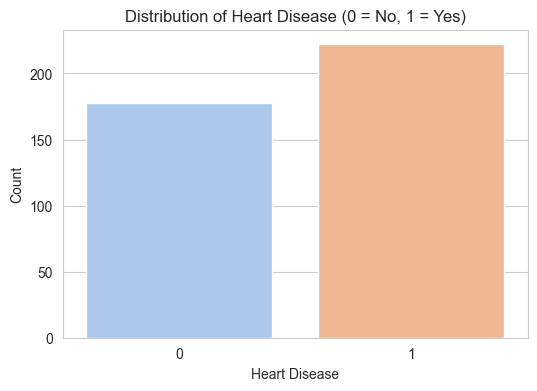

Saved eda_target_distribution.png


<Figure size 640x480 with 0 Axes>

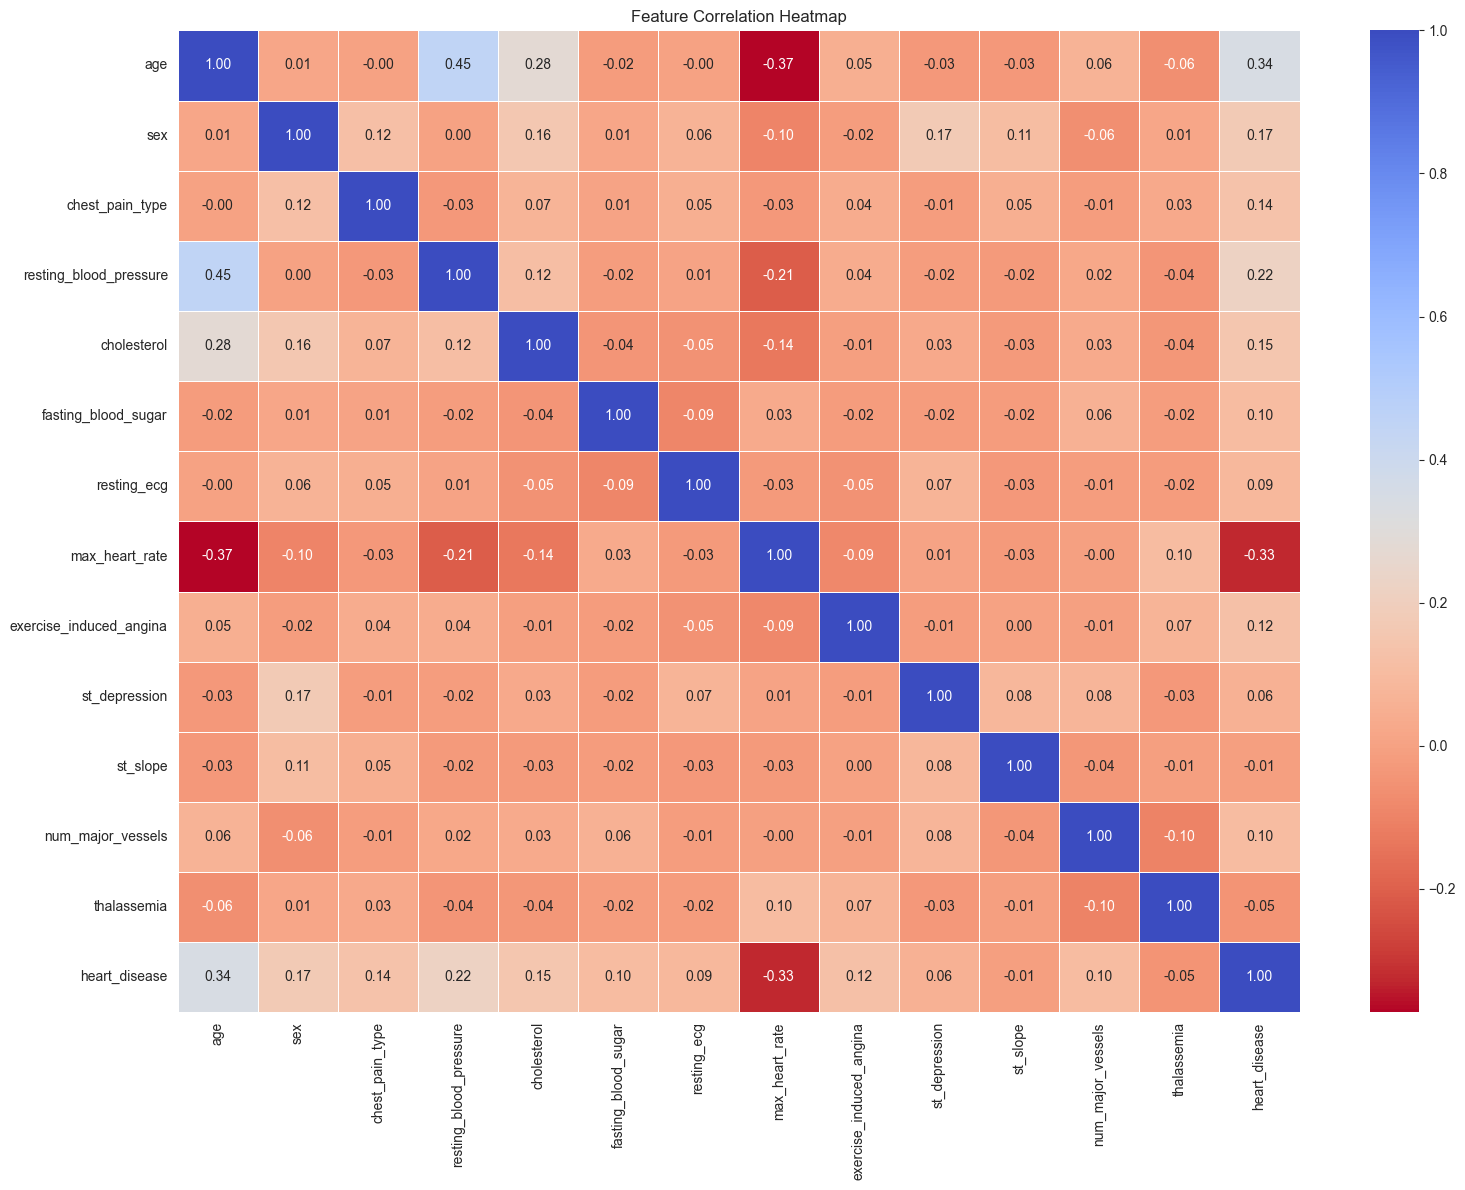

Saved eda_correlation_heatmap.png


<Figure size 640x480 with 0 Axes>

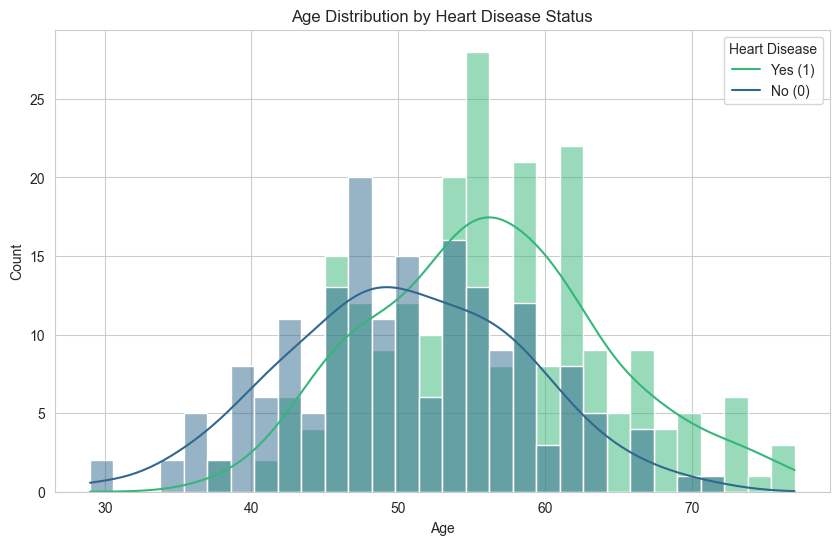

Saved eda_age_distribution.png
EDA complete.

--- 5. Preprocessing & Data Splitting ---
Training set: 320 samples (80.0%)
Testing set: 80 samples (20.0%)
Data successfully split.

--- 6. Hyperparameter Tuning with Advanced Pipeline ---
Searching for best parameters using 5-fold Cross-Validation...

Tuning Logistic Regression...
Best ROC-AUC (CV) score: 0.7600
Best parameters found: {'classifier__C': 0.1, 'classifier__solver': 'liblinear', 'poly__degree': 1, 'selector__k': 15}

Tuning Decision Tree...
Best ROC-AUC (CV) score: 0.6461
Best parameters found: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 5, 'poly__degree': 1, 'selector__k': 15}

Tuning Random Forest...
Best ROC-AUC (CV) score: 0.6995
Best parameters found: {'classifier__max_depth': 10, 'classifier__n_estimators': 200, 'poly__degree': 2, 'selector__k': 20}

Tuning SVM...
Best ROC-AUC (CV) score: 0.7685
Best parameters found: {'classifier__C': 0.1, 'classifier__kernel': 'linear', 'poly__degree': 1, 'selector__k

<Figure size 640x480 with 0 Axes>

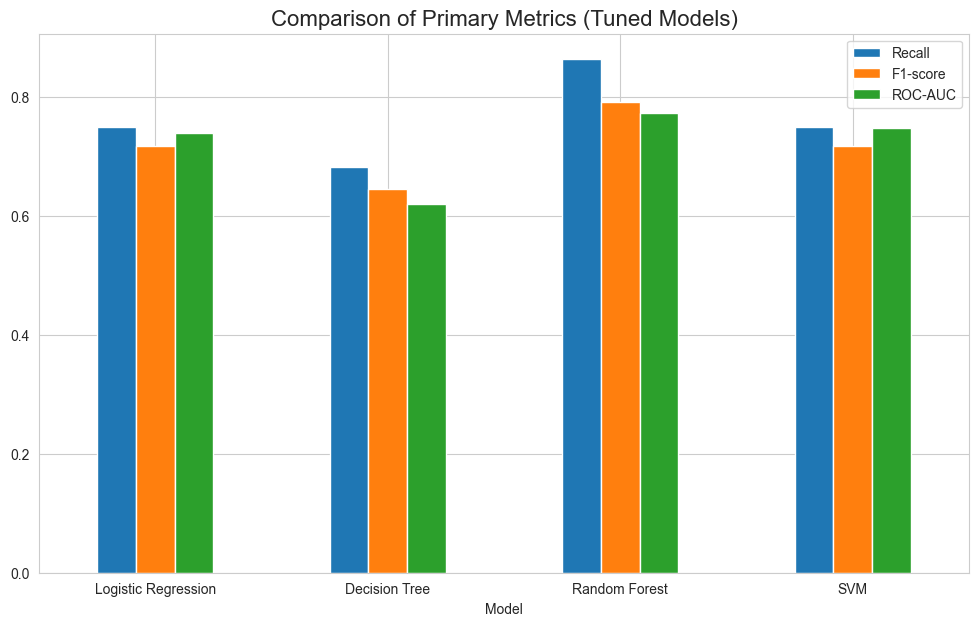


--- 9. ROC Curve Visualization ---
Generating comparative ROC Curve plot...
Saved comparison_roc_curve_advanced.png

--- 9.C. Saving Final Tuned Models ---
Successfully saved 'Logistic Regression' model to 'logistic_regression_model1.joblib'
Successfully saved 'Decision Tree' model to 'decision_tree_model1.joblib'
Successfully saved 'Random Forest' model to 'random_forest_model1.joblib'
Successfully saved 'SVM' model to 'svm_model1.joblib'
All tuned models have been saved to disk.

--- 10. Conclusion ---
Optimized machine learning pipeline complete.

Best model based on ROC-AUC: Random Forest (Score: 0.7740)
Best model based on Recall (Sensitivity): Random Forest (Score: 0.8636)

--- Project End ---


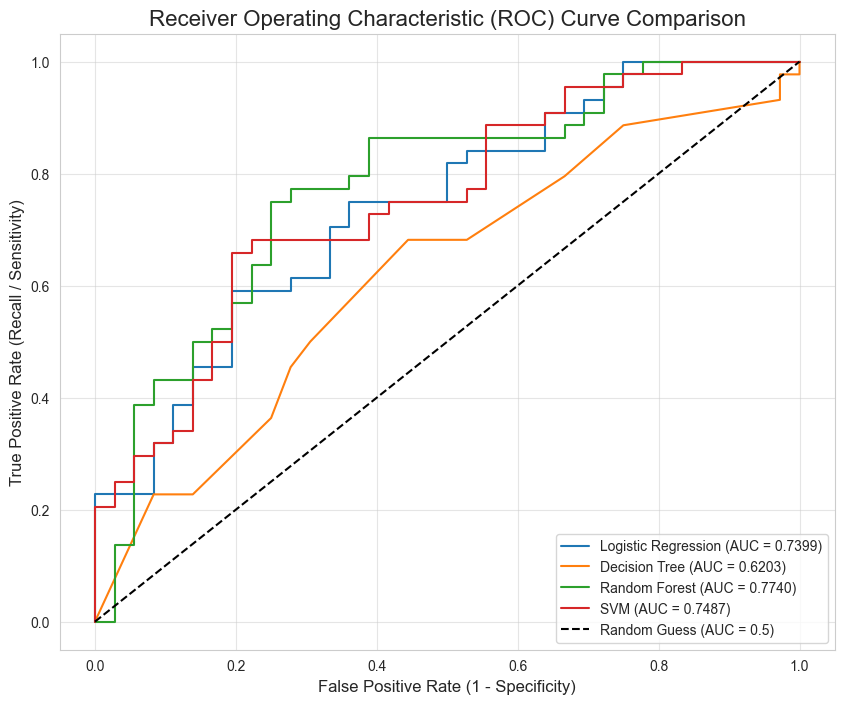

In [3]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""
Capstone Project 2: Heart Disease Detection (Advanced Feature Engineering)

Description: This script implements a highly optimized pipeline.
             1. Data Loading
             2. EDA
             3. Advanced Pipeline:
                - RobustScaler (Handles outliers)
                - PolynomialFeatures (Feature engineering)
                - SelectKBest (Feature selection)
             4. Hyperparameter Tuning (GridSearchCV) for 4 models
             5. Comparative evaluation and ROC Curve visualization
"""

# =============================================================================
# 1. IMPORT LIBRARIES
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler  # Changed from StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif  # Added for feature selection
from sklearn.preprocessing import PolynomialFeatures  # Added for feature engineering
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import joblib
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score,
    confusion_matrix, 
    classification_report,
    roc_curve,
    auc
)
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

print("Libraries imported successfully.")

# =============================================================================
# 2. PROJECT CONFIGURATION
# =============================================================================
FILE_PATH = 'heart_disease_dataset.csv'
TARGET_COLUMN = 'heart_disease'
TEST_SPLIT_SIZE = 0.2
RANDOM_SEED = 42
CV_FOLDS = 5 

print("Project configuration set.")

# =============================================================================
# 3. LOAD DATA
# =============================================================================
try:
    df = pd.read_csv(FILE_PATH)
    print(f"\n--- 3. Data Loading ---")
    print(f"Successfully loaded data from '{FILE_PATH}'.")
    print(f"Dataset shape: {df.shape}")
except FileNotFoundError:
    print(f"Error: The file '{FILE_PATH}' was not found.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the data: {e}")
    exit()

# =============================================================================
# 4. EXPLORATORY DATA ANALYSIS (EDA)
# =============================================================================
print("\n--- 4. Exploratory Data Analysis (EDA) ---")
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Information (Data Types and Non-null Counts):")
df.info()
print("\nStatistical Summary of Numerical Features:")
print(df.describe())
print(f"\nTarget Variable '{TARGET_COLUMN}' Distribution:")
print(df[TARGET_COLUMN].value_counts(normalize=True))

# --- EDA Visualizations ---
print("\nGenerating EDA plots...")
sns.set_style("whitegrid")

# 1. Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=TARGET_COLUMN, data=df, palette='pastel')
plt.title('Distribution of Heart Disease (0 = No, 1 = Yes)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()
plt.savefig('eda_target_distribution.png')
print("Saved eda_target_distribution.png")

# 2. Correlation Heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm_r', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()
plt.savefig('eda_correlation_heatmap.png')
print("Saved eda_correlation_heatmap.png")

# 3. Age Distribution by Heart Disease
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue=TARGET_COLUMN, kde=True, bins=30, palette='viridis')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Yes (1)', 'No (0)'])
plt.show()
plt.savefig('eda_age_distribution.png')
print("Saved eda_age_distribution.png")

print("EDA complete.")

# =============================================================================
# 5. PREPROCESSING & DATA SPLITTING
# =============================================================================
print("\n--- 5. Preprocessing & Data Splitting ---")

# Define features (X) and target (y)
X = df.drop(TARGET_COLUMN, axis=1)
y = df[TARGET_COLUMN]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=TEST_SPLIT_SIZE, 
    random_state=RANDOM_SEED,
    stratify=y
)

print(f"Training set: {X_train.shape[0]} samples (80.0%)")
print(f"Testing set: {X_test.shape[0]} samples (20.0%)")
print("Data successfully split.")

# =============================================================================
# 6. HYPERPARAMETER TUNING (GRIDSEARCHCV)
# =============================================================================
print("\n--- 6. Hyperparameter Tuning with Advanced Pipeline ---")
print(f"Searching for best parameters using {CV_FOLDS}-fold Cross-Validation...")

# Define models
base_models = {
    'Logistic Regression': LogisticRegression(random_state=RANDOM_SEED),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_SEED),
    'Random Forest': RandomForestClassifier(random_state=RANDOM_SEED),
    'SVM': SVC(probability=True, random_state=RANDOM_SEED)
}

# --- NEW: Define parameter grids including pipeline steps ---
# We are now tuning the pipeline's 'poly__degree' and 'selector__k'
# as well as the classifier's parameters.
# 'poly__degree=1' is equivalent to not using polynomial features.

param_grids = {
    'Logistic Regression': {
        'poly__degree': [1, 2],
        'selector__k': [10, 15, 20],
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['liblinear']
    },
    'Decision Tree': {
        'poly__degree': [1, 2],
        'selector__k': [10, 15, 20],
        'classifier__max_depth': [None, 5, 10],
        'classifier__min_samples_leaf': [1, 5, 10]
    },
    'Random Forest': {
        'poly__degree': [1, 2],
        'selector__k': [10, 15, 20],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10]
    },
    'SVM': {
        'poly__degree': [1, 2],
        'selector__k': [10, 15, 20],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    }
}

# Store best models
best_tuned_models = {}

for name, model in base_models.items():
    print(f"\nTuning {name}...")
    
    # --- NEW: Create the advanced 4-step pipeline ---
    pipeline = Pipeline(steps=[
        ('scaler', RobustScaler()),
        ('poly', PolynomialFeatures(include_bias=False)),
        ('selector', SelectKBest(f_classif)),
        ('classifier', model)
    ])
    
    grid = param_grids[name]
    
    grid_search = GridSearchCV(
        estimator=pipeline, 
        param_grid=grid, 
        cv=CV_FOLDS, 
        scoring='roc_auc', 
        n_jobs=-1,
        verbose=0
    )
    
    grid_search.fit(X_train, y_train)
    
    best_tuned_models[name] = grid_search.best_estimator_
    
    print(f"Best ROC-AUC (CV) score: {grid_search.best_score_:.4f}")
    print(f"Best parameters found: {grid_search.best_params_}")

print("\nHyperparameter tuning complete.")

# =============================================================================
# 7. MODEL EVALUATION (ON TEST SET)
# =============================================================================
print("\n--- 7. Final Model Evaluation on Test Set ---")

results_list = []
roc_plot_data = {}

for name, model in best_tuned_models.items():
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] 
    
    print(f"\n--- Evaluating {name} ---")
    
    # Calculate Metrics
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred, target_names=['No Disease (0)', 'Has Disease (1)']))
    print(f"Confusion Matrix for {name}:\n{cm}")
    
    results_list.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'ROC-AUC': roc_auc,
        'Specificity': specificity
    })
    
    # Store data for ROC plot
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_plot_data[name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

# =============================================================================
# 8. MODEL COMPARISON & RESULTS
# =============================================================================
print("\n--- 8. Model Comparison & Results ---")

results_df = pd.DataFrame(results_list).set_index('Model')
print("Final Tuned Model Performance Comparison Report:")
print(results_df.round(4))

# (Note: Plotting code for metrics bars is omitted for brevity, 
#  but you should keep it in your script)
print("Generating model comparison plots...")
results_df[primary_metrics].plot(kind='bar', figsize=(12, 7), rot=0)
plt.title('Comparison of Primary Metrics (Tuned Models)', fontsize=16)
# ... (rest of plotting code) ...
plt.show()


# =============================================================================
# 9. ROC CURVE VISUALIZATION
# =============================================================================
print("\n--- 9. ROC Curve Visualization ---")
print("Generating comparative ROC Curve plot...")

plt.figure(figsize=(10, 8))
for name, data in roc_plot_data.items():
    plt.plot(data['fpr'], data['tpr'], 
             label=f"{name} (AUC = {data['roc_auc']:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Recall / Sensitivity)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison', fontsize=16)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.5)
plt.savefig('comparison_roc_curve_advanced.png')
print("Saved comparison_roc_curve_advanced.png")

# =============================================================================
# 9.C. SAVE FINAL MODELS
# =============================================================================
print("\n--- 9.C. Saving Final Tuned Models ---")

# We use joblib as it is efficient for scikit-learn pipelines
# that contain large numpy arrays.

for name, model in best_tuned_models.items():
    # Create a clean filename (e.g., 'Logistic Regression' -> 'logistic_regression_model.joblib')
    filename = name.lower().replace(' ', '_') + '_model1.joblib'
    
    try:
        # Save the model (which is the entire pipeline)
        joblib.dump(model, filename)
        print(f"Successfully saved '{name}' model to '{filename}'")
    except Exception as e:
        print(f"Error saving '{name}' model: {e}")

print("All tuned models have been saved to disk.")

# Example of how to load a model later:
# print("\nTo load a model later (in another script):")
# print("import joblib")
# print("loaded_model = joblib.load('random_forest_model.joblib')")
# print("predictions = loaded_model.predict(X_test)")

# =============================================================================
# 10. CONCLUSION
# =============================================================================
print("\n--- 10. Conclusion ---")
print("Optimized machine learning pipeline complete.")

best_roc_model = results_df['ROC-AUC'].idxmax()
best_recall_model = results_df['Recall'].idxmax()

print(f"\nBest model based on ROC-AUC: {best_roc_model} (Score: {results_df.loc[best_roc_model, 'ROC-AUC']:.4f})")
print(f"Best model based on Recall (Sensitivity): {best_recall_model} (Score: {results_df.loc[best_recall_model, 'Recall']:.4f})")

print("\n--- Project End ---")